# Pengembangan *Machine Learning*
**memprediksi apakah terjadi inefisiensi pada klaim yang diajukan oleh fasilitas kesehatan ke BPJS Kesehatan**

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

## Data Preparation

In [3]:
sampl = pd.read_csv('sampling_healtkathon2022.csv')
sampl.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0


In [4]:
sampl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.9+ GB


In [5]:
sampl_diag = pd.read_csv('sampling_healthkathon2022_diagnosa.csv')
sampl_diag.head()

,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1


In [6]:
sampl_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17308536 entries, 0 to 17308535
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   id       int64 
 1   diag     object
 2   levelid  int64 
dtypes: int64(2), object(1)
memory usage: 396.2+ MB


In [7]:
sampl_proc = pd.read_csv('sampling_healthkathon2022_procedure.csv')
sampl_proc.head()

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78


In [8]:
sampl_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12202871 entries, 0 to 12202870
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   proc    object
dtypes: int64(1), object(1)
memory usage: 186.2+ MB


## Data Cleansing

In [9]:
sampl.isna().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041455
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

In [10]:
sampl = sampl.dropna(subset=['jenkel', 'pisat', 'politujuan', 'diagfktp', 'jenispulang'])
sampl['biaya'] = sampl['biaya'].fillna(sampl['biaya'].mean())
sampl['kdsa'] = sampl['kdsa'].fillna('None')
sampl['kdsp'] = sampl['kdsp'].fillna('None')
sampl['kdsr'] = sampl['kdsr'].fillna('None')
sampl['kdsi'] = sampl['kdsi'].fillna('None')
sampl['kdsd'] = sampl['kdsd'].fillna('None')

In [11]:
sampl.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
politujuan     0
diagfktp       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
kdsa           0
kdsp           0
kdsr           0
kdsi           0
kdsd           0
label          0
dtype: int64

In [12]:
sampl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357672 entries, 0 to 11401848
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.3+ GB


In [13]:
sampl_diag.isna().sum()

id         0
diag       0
levelid    0
dtype: int64

In [14]:
sampl_proc.isna().sum()

id      0
proc    0
dtype: int64

## Exploratory Data Analysis

## Features Engineering

In [15]:
sampl[['tgldatang','tglpulang']] = sampl[['tgldatang','tglpulang']].apply(pd.to_datetime)
sampl['durasi'] = (sampl['tglpulang'] - sampl['tgldatang']).dt.days
sampl.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,durasi
0,165666,486,17,KL,48,P,1.0,2018-07-25 17:00:00+00:00,2018-07-25 17:00:00+00:00,2,...,1.0,Q-5-42-0,3,None,None,None,None,None,0,0
2,166042,523,17,KL,53,P,1.0,2019-07-16 17:00:00+00:00,2019-07-16 17:00:00+00:00,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,0,0
3,168937,549,17,KL,54,P,1.0,2019-10-17 17:00:00+00:00,2019-10-17 17:00:00+00:00,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,0,0
4,1005899,549,17,A,53,P,1.0,2018-04-18 17:00:00+00:00,2018-04-18 17:00:00+00:00,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,0,0
5,51010,663,8,SD,50,P,1.0,2018-12-26 17:00:00+00:00,2018-12-26 17:00:00+00:00,2,...,2.0,Q-5-33-0,3,None,None,None,None,None,0,0


In [16]:
sampl['durasi'].unique()

array([ 0,  2,  3,  4,  1, 58, 12,  5,  7, 10,  9,  8, 56, 69,  6, 16, 14,
       42, 44, 54, 11, 47, 13], dtype=int64)

In [17]:
labelencoder = LabelEncoder()
sampl['jenkel'] = labelencoder.fit_transform(sampl['jenkel'])
sampl.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,durasi
0,165666,486,17,KL,48,1,1.0,2018-07-25 17:00:00+00:00,2018-07-25 17:00:00+00:00,2,...,1.0,Q-5-42-0,3,None,None,None,None,None,0,0
2,166042,523,17,KL,53,1,1.0,2019-07-16 17:00:00+00:00,2019-07-16 17:00:00+00:00,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,0,0
3,168937,549,17,KL,54,1,1.0,2019-10-17 17:00:00+00:00,2019-10-17 17:00:00+00:00,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,0,0
4,1005899,549,17,A,53,1,1.0,2018-04-18 17:00:00+00:00,2018-04-18 17:00:00+00:00,2,...,1.0,Q-5-44-0,3,None,None,None,None,None,0,0
5,51010,663,8,SD,50,1,1.0,2018-12-26 17:00:00+00:00,2018-12-26 17:00:00+00:00,2,...,2.0,Q-5-33-0,3,None,None,None,None,None,0,0


In [18]:
sampl_proc['proc']

0           90.59
1           69.01
2           88.78
3           90.59
4           88.78
            ...  
12202866    93.57
12202867    89.52
12202868    96.55
12202869    87.39
12202870    93.96
Name: proc, Length: 12202871, dtype: object

In [19]:
sampl_proc['proc'] = pd.to_numeric(sampl_proc['proc'], errors='coerce')

In [20]:
sampl_proc[sampl_proc['proc'].isnull()]

,id,proc
4099,49304,NaN
4100,49305,NaN
29566,307778,NaN
29570,307806,NaN
29574,307843,NaN
...,...,...
12197909,11384516,NaN
12197913,11384562,NaN
12197915,11384588,NaN
12197917,11384628,NaN


In [21]:
sampl_proc = sampl_proc.dropna(subset=['proc'])
sampl_proc.head()

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78


In [22]:
len(sampl_proc['proc'].unique())

3672

In [23]:
sampl_1 = sampl.merge(sampl_diag, left_on = "id", right_on = "id")
sampl_1.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label,durasi,diag,levelid
0,165666,486,17,KL,48,1,1.0,2018-07-25 17:00:00+00:00,2018-07-25 17:00:00+00:00,2,...,3,None,None,None,None,None,0,0,H60.9,1
1,166042,523,17,KL,53,1,1.0,2019-07-16 17:00:00+00:00,2019-07-16 17:00:00+00:00,2,...,3,None,None,None,None,None,0,0,K30,2
2,166042,523,17,KL,53,1,1.0,2019-07-16 17:00:00+00:00,2019-07-16 17:00:00+00:00,2,...,3,None,None,None,None,None,0,0,L80,2
3,166042,523,17,KL,53,1,1.0,2019-07-16 17:00:00+00:00,2019-07-16 17:00:00+00:00,2,...,3,None,None,None,None,None,0,0,E11.9,1
4,168937,549,17,KL,54,1,1.0,2019-10-17 17:00:00+00:00,2019-10-17 17:00:00+00:00,2,...,3,None,None,None,None,None,0,0,H52.0,2


In [24]:
sampling = sampl_1.merge(sampl_proc, left_on = "id", right_on = "id")
sampling.head()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,kdsa,kdsp,kdsr,kdsi,kdsd,label,durasi,diag,levelid,proc
0,143197,736,17,KI,46,1,1.0,2020-04-19 17:00:00+00:00,2020-04-19 17:00:00+00:00,2,...,None,None,None,None,None,0,0,A09.9,1,99.18
1,1057379,751,17,B,60,0,1.0,2019-10-08 17:00:00+00:00,2019-10-08 17:00:00+00:00,2,...,None,None,None,None,None,0,0,K04.1,1,87.12
2,1052148,1123,17,B,15,0,4.0,2019-04-11 17:00:00+00:00,2019-04-11 17:00:00+00:00,2,...,None,None,None,None,None,0,0,M25.6,1,93.34
3,1052148,1123,17,B,15,0,4.0,2019-04-11 17:00:00+00:00,2019-04-11 17:00:00+00:00,2,...,None,None,None,None,None,0,0,M25.6,1,93.35
4,998994,1289,17,A,37,1,1.0,2019-02-11 17:00:00+00:00,2019-02-11 17:00:00+00:00,2,...,None,None,None,None,None,0,0,J45.9,1,93.94


In [25]:
sampling['label'].value_counts()

0    6146557
1      92177
Name: label, dtype: int64

In [26]:
sampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6238734 entries, 0 to 6238733
Data columns (total 26 columns):
 #   Column       Dtype              
---  ------       -----              
 0   id           int64              
 1   id_peserta   int64              
 2   dati2        int64              
 3   typefaskes   object             
 4   usia         int64              
 5   jenkel       int32              
 6   pisat        float64            
 7   tgldatang    datetime64[ns, UTC]
 8   tglpulang    datetime64[ns, UTC]
 9   jenispel     int64              
 10  politujuan   object             
 11  diagfktp     object             
 12  biaya        float64            
 13  jenispulang  float64            
 14  cbg          object             
 15  kelasrawat   int64              
 16  kdsa         object             
 17  kdsp         object             
 18  kdsr         object             
 19  kdsi         object             
 20  kdsd         object             
 21  label   

Text(0.5, 1.0, 'Correlation ')

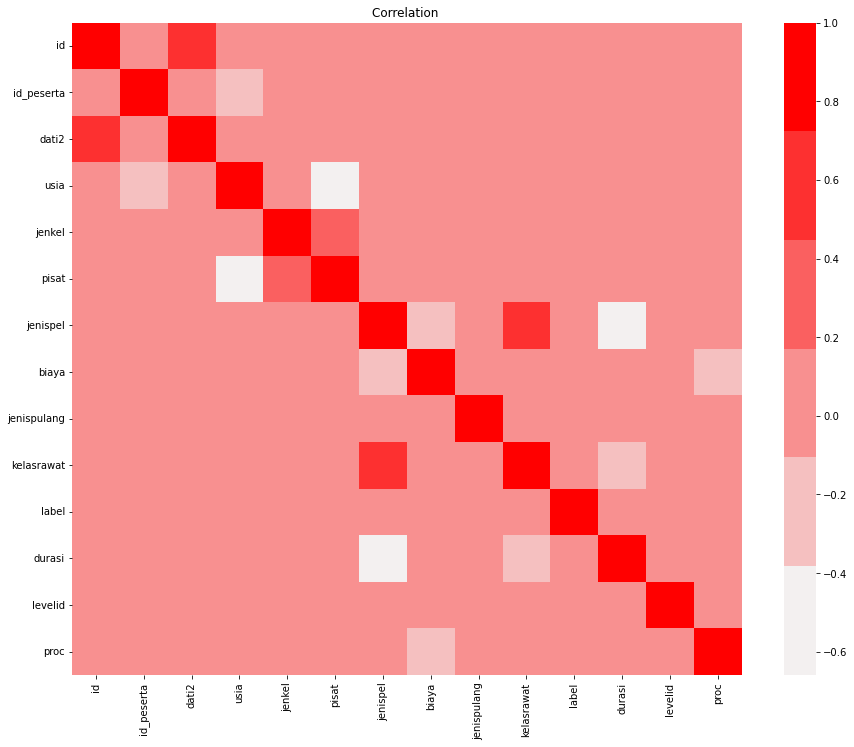

In [27]:
corr=sampling.corr()
fig = plt.figure(figsize=(15,12))
warna = sns.light_palette("red")
r = sns.heatmap(corr, cmap=warna)
r.set_title("Correlation ")

## Modeling

In [28]:
# defining feature matrix(X) and response vector(y)
# x = sampling.drop(['id', 'id_peserta', 'typefaskes', 'tgldatang', 'tglpulang', 'politujuan', 'diagfktp', 'cbg', 'kdsa', 'kdsp', 'kdsr','kdsi', 'kdsd', 'label', 'diag'], axis=1)
x = sampling.drop(['id_peserta', 'typefaskes', 'tgldatang', 'tglpulang', 'politujuan', 'diagfktp', 'cbg', 'kdsa', 'kdsp', 'kdsr','kdsi', 'kdsd', 'label', 'diag'], axis=1)
y = sampling['label']

In [29]:
x

,id,dati2,usia,jenkel,pisat,jenispel,biaya,jenispulang,kelasrawat,durasi,levelid,proc
0,143197,17,46,1,1.0,2,186800.0,1.0,3,0,1,99.18
1,1057379,17,60,0,1.0,2,211400.0,1.0,3,0,1,87.12
2,1052148,17,15,0,4.0,2,114400.0,1.0,3,0,1,93.34
3,1052148,17,15,0,4.0,2,114400.0,1.0,3,0,1,93.35
4,998994,17,37,1,1.0,2,479000.0,1.0,3,0,1,93.94
...,...,...,...,...,...,...,...,...,...,...,...,...
6238729,6682407,112,0,0,4.0,2,308800.0,1.0,3,0,2,99.41
6238730,1471971,113,0,1,4.0,2,312000.0,1.0,3,0,1,90.59
6238731,1985554,122,22,1,4.0,2,549400.0,1.0,3,0,1,88.73
6238732,9796437,265,0,0,1.0,2,339100.0,5.0,3,0,1,88.72


In [30]:
y

0          0
1          0
2          0
3          0
4          0
          ..
6238729    0
6238730    0
6238731    0
6238732    0
6238733    0
Name: label, Length: 6238734, dtype: int64

In [31]:
# splitting x and y into training and testing sets
from sklearn.model_selection import train_test_split #mengimport library train_test_split dari sklearn.model_selection
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) 

In [32]:
x_train

,id,dati2,usia,jenkel,pisat,jenispel,biaya,jenispulang,kelasrawat,durasi,levelid,proc
3142310,1651544,115,49,1,3.0,2,403400.0,2.0,3,0,2,83.09
5043731,8311761,143,48,0,1.0,2,142400.0,1.0,3,0,1,99.29
441732,1119169,9,18,1,4.0,2,256700.0,1.0,3,0,1,96.52
4893127,2168951,131,1,0,4.0,2,191800.0,1.0,3,0,1,87.44
666629,5948467,496,20,0,4.0,2,154000.0,1.0,3,0,1,90.59
...,...,...,...,...,...,...,...,...,...,...,...,...
4259919,2640116,137,30,1,4.0,2,325700.0,1.0,3,0,2,89.54
2961239,1512145,113,7,0,4.0,2,193800.0,1.0,3,0,1,90.59
4405059,5576883,381,21,1,1.0,2,319700.0,1.0,3,0,1,88.78
5298968,9490675,212,48,0,2.0,2,192400.0,1.0,3,0,2,90.59


In [33]:
# # Decision Tree
# from sklearn import tree #mengimport library tree dari sklearn
# dtree = tree.DecisionTreeClassifier()
# dtree = dtree.fit(x_train, y_train)

In [34]:
# Random forest
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf = rf.fit(x_train, y_train) #random forest classifier berdasarkan parameter x_train dan y_train

In [35]:
# save random forest model
import pickle

filename = "rf_model.sav"
pickle.dump(rf, open(filename, 'wb'))

# load model
rf = pickle.load(open(filename, 'rb'))

NameError: name 'rf' is not defined

## Evaluation

In [ ]:
#y_svm = clf.predict(x_test) #mendefinisikan objek y_svm sebagai hasil prediksi dari model svm yang dibuat ke test set
# y_dtree = dtree.predict(x_test.drop('id', axis=1)) #mendefinisikan objek y_dtree sebagai hasil prediksi dari model decision treee yang dibuat ke test set
y_rf = rf.predict(x.drop['id'], axis=1) #mendefinisikan objek y_rf sebagai hasil prediksi dari model decision treee yang dibuat ke test set

In [ ]:
from sklearn.metrics import accuracy_score #mengimport accuracy_score dari sklearn.metrics
# acc_dtree = accuracy_score(y_test, y_dtree)
acc_rf = accuracy_score(y, y_rf)
#acc_svm = accuracy_score(y_test, y_svm)
# print('Accuracy with Dtree : ',acc_dtree) 
print('Accuracy with Rf : ',acc_rf)
#print('Accuracy with Svm : ',acc_svm)

In [ ]:
from sklearn.metrics import precision_score #mengimport precision_score dari sklearn.metrics
# pre_dtree = precision_score(y_test, y_dtree, average='macro')
pre_rf = precision_score(y, y_rf, average='macro')
#pre_svm = precision_score(y_test, y_svm, average='macro')
# print('Precision with Dtree : ',pre_dtree)
print('Precision with Rf : ',pre_rf)
#print('Precision with Svm : ',pre_svm)

In [ ]:
from sklearn.metrics import recall_score #mengimport recall_score dari sklearn.metrics
# rec_dtree = recall_score(y_test, y_dtree, average='macro')
rec_rf = recall_score(y, y_rf, average='macro')
#rec_svm = recall_score(y_test, y_svm, average='macro')
# print('Recall with Dtree : ',rec_dtree)
print('Recall with RF : ',rec_rf)
#print('Recall with Svm : ',rec_svm)

In [ ]:
x_test

In [ ]:
x_copy = x
x_copy['label'] = y_rf
x_copy

In [ ]:
 x_copy =  x_copy[['id','label']]

In [ ]:
x_copy

In [ ]:
x_copy.to_csv('answer.csv', index=False, encoding='utf8')

In [ ]:
from sklearn.metrics import confusion_matrix
cm=(confusion_matrix(y, y_rf))
specifity = cm[0,0]/(cm[0,0]+cm[0,1])
specifity